# Task 2 Predictive modeling of customer bookings

---

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

## Explore the Data

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [358]:
import pandas as pd

In [359]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [361]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Preprocess the Data

In [362]:
from sklearn.preprocessing import LabelEncoder

### Step 1: Clean the Data

Drop unnecessary columns

In [363]:
df.drop(columns='route', inplace=True)

Convert the booking_origin column's country values into continents.

In [364]:
import pycountry
import pycountry_convert as pc


# Function to convert country to continent
def country_to_continent(country_name):
    try: 
        country_alpha2 = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name 
    except Exception as e: 
        return 'Unknown'

# Apply the function to the DataFrame
df['booking_origin'] = df['booking_origin'].apply(country_to_continent)
df['booking_origin'].unique()

array(['Oceania', 'Asia', 'Europe', 'Africa', 'Unknown', 'North America',
       'South America'], dtype=object)

Check how many unknow value

In [365]:
df.loc[df['booking_origin']=='Unknown']['booking_origin'].count()

np.int64(650)

Drop the unknown continent rows

In [366]:
df.drop(index=df[df['booking_origin']=='Unknown'].index, inplace=True)

### Step 2: Transform the Data
#### Transform the categorical variables into numerical values

One-Hot Encoding for categorical features without order

In [367]:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'booking_origin'])

Label Encoding for ordinal features.

In [368]:
df['flight_day'] = LabelEncoder() .fit_transform(df['flight_day'])
df["flight_day"].unique()

array([2, 6, 4, 1, 3, 5, 0])

## Predictive Modelling

In [369]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn

### Step 1: Define the Test and Train Dataset

Choose the 'booking_complete' columns as target

In [370]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

Set train dataset size as 80% of origin dataset, test dataset size as 20%

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Step 2: Train the Model

Select the random forest model

In [372]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Step 3: Evaluate the Model

Get the precision score

In [373]:
rf.score(X_test, y_test)

0.8493414387031408

Define Predicted Target

In [374]:
y_pred = rf.predict(X_test)

Get the classification report

In [375]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8404
           1       0.45      0.07      0.12      1466

    accuracy                           0.85      9870
   macro avg       0.65      0.53      0.52      9870
weighted avg       0.80      0.85      0.80      9870



Rank the features via importance

In [376]:
featuresRanking = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=["importance"])
featuresRanking.sort_values(by='importance', inplace=True)
featuresRanking

,importance
booking_origin_South America,0.000111
trip_type_CircleTrip,0.000346
booking_origin_Africa,0.000380
trip_type_OneWay,0.000995
trip_type_RoundTrip,0.001320
booking_origin_Europe,0.001628
booking_origin_North America,0.001717
sales_channel_Internet,0.003456
sales_channel_Mobile,0.003555
wants_extra_baggage,0.013943


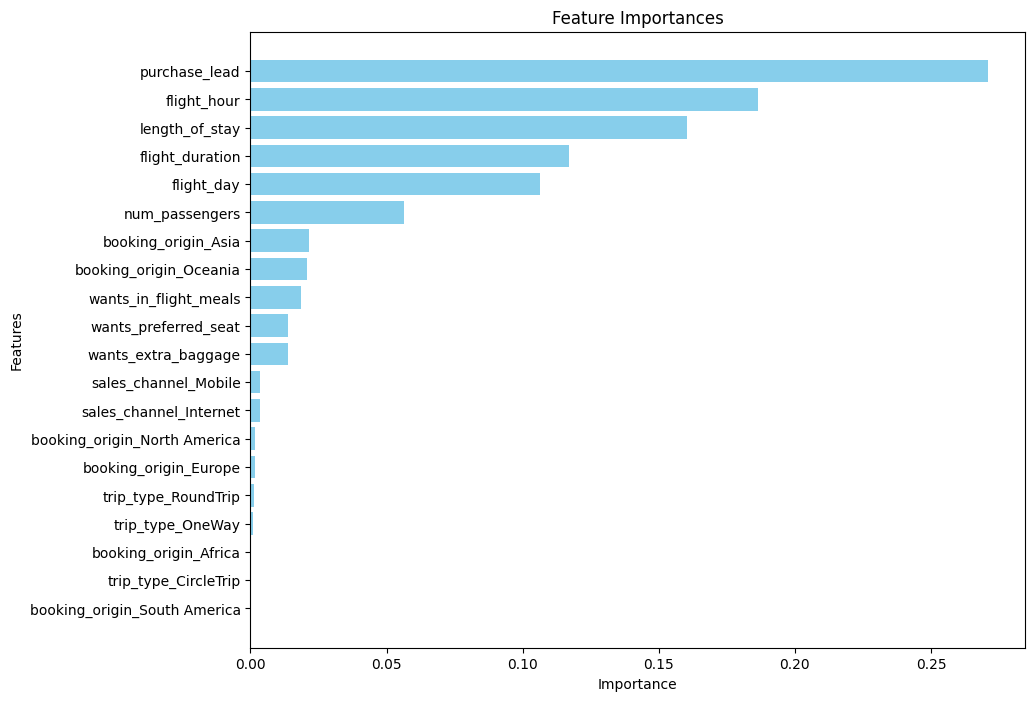

In [377]:
plt.figure(figsize=(10, 8))
plt.barh(featuresRanking.index, featuresRanking['importance'], color='skyblue') 
plt.xlabel('Importance') 
plt.ylabel('Features') 
plt.title('Feature Importances') 
plt.show()

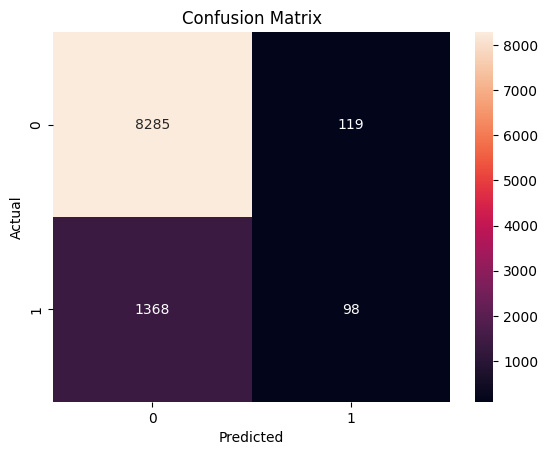

In [378]:
cm = confusion_matrix(y_test, y_pred)
seaborn.heatmap(cm, annot=True, fmt='d' ) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()